In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

In this documentation, introduce the basic knowledge and examples of `matplotlib` in Python.

As defined in the matplotlib [Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html), 
> Plotting requires action on a range of levels, from the most general (e.g., ‘contour this 2-D array’) to the most specific (e.g., ‘color this screen pixel red’). The purpose of a plotting package is to assist you in visualizing your data as easily as possible, with all the necessary control – that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

> Therefore, everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib “state-machine environment” which is provided by the matplotlib.pyplot module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

There are mainly two kinds of APIs in `matplotlib`: pyplot API and the object-oriented API. In many codes online, people tend to use different styles or even mix the two styles up, which is quite confusing and sometimes even messy. Thus, in the following, I will demonstrate the two styles of using `matplotlib`, and in our own coding, we should mainly stick to one style for better readbility.

The highest-level (easiest) "state-machine environment" `pyplot` moduleexposes APIs very similar to the ones of MATLAB. Usually, one who is familiar with MATLAB will start from here.

*Note: `pyplot` (plt) is a module, not a class. Thus,`plt.plot` is calling the independent function (instead of a method of a class) of the `pyplot` module.*  

# <font color='blue'>*plt *interfaces similar to MATLAB</font>
## Single plot in a figure
1. Use `fig = plt.figure()` to create a figure object of type `matplotlib.figure.Figure`.  
    * In the `plt.figure()` function, we may specify additional parameters, like the size of the figure `plt.figure(figsize=(10, 8))`, see the documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html)
2. Next, we can use some plotting functions like `plt.plot` or `sns.barplot` to make some plots.    
3. *In other IDEs, like PyCharm, you may need to call `plt.show()` at last to show the figure. However, it is NOT necessary in Jupyter notebook. Thus, this command is ignored here.*

type of fig is  <class 'matplotlib.figure.Figure'>


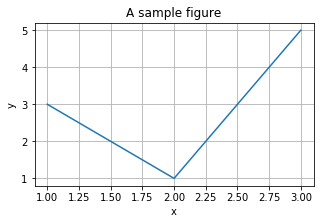

In [3]:
fig = plt.figure(figsize=(5, 3))
plt.title('A sample figure')
plt.plot([1, 2, 3], [3, 1, 5])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)  # similar to MATLAB grid on
print('type of fig is ', type(fig))

As we can see, this set of functions we used are very similar to the ones of MATLAB. In fact, they are designed on purpose to mimic MATLAB functions.

Unlike MATLAB, if we need to plot more lines on a single plot, no need to use *hold on*, just call `plt.plot` multiple times.

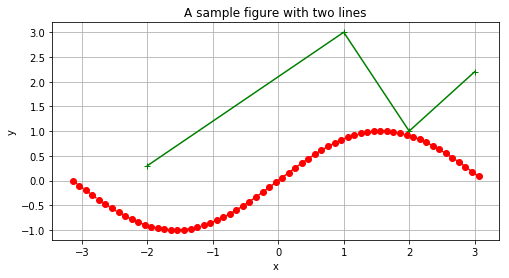

In [4]:
x = np.arange(-3.14, 3.14, 0.1)   # similar to range function in Python, but the returned x is a np.array
y = np.sin(x)

fig = plt.figure(figsize=(8, 4))
plt.title('A sample figure with two lines')
plt.plot([-2, 1, 2, 3], [0.3, 3, 1, 2.2], 'g+-')  # like MATLAB: 'g+-' is green, marker + and solid line
plt.plot(x, y, 'ro--')  # red, marker o, and dashed line
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)  # similar to MATLAB grid on

Note: in `plt.plot`, we can use two styles to specify the line styles
- Use [format strings](https://matplotlib.org/2.2.2/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) like MATLAB, for example, '`ro--`'
- Specify the color, marker and linestyle explicity using keyword arguments. For example, `plt.plot(x, y, 'ro--')` is equivalent to `plot(x, y, color='red', marker='o', linestyle='dashed')`
- There are many other properties we can configure in `plt.plot`, like `linewidth` and `markersize`. Refer to the [documentation](https://matplotlib.org/2.2.2/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).

Of course, just like MATLAB, apart from the basic line plotting, we can use the `plt` module to draw many other kinds of plots, such as `plt.bar` and `plt.pie`. For an overview, check the module documentation [here](https://matplotlib.org/api/pyplot_summary.html). Or, you may check all the official examples [here](https://matplotlib.org/gallery/index.html).

Always remember to Google when difficulties are encountered. For example, Google 'pyplot pie chart' to find information of how to draw a boxplot in matplotlib.pyplot.

## Multiple subplots in a figure
Another core concept in `matplotlib` is `Axes`.  A `Figure` may contain multiple `Axes`, each corresponding to a subplot. The anatomy of a figure in `matplotlib` is shown below. Therefore, we can use an `axes` object to refer to a subplot.

![anatomy](anatomy.png)


There are also more than one styles to make subplots. The first style is also similar to MATLAB. We use a `plt.subplot` function, just like the one in MATLAB.

Text(0.5,0,'x-histogram')

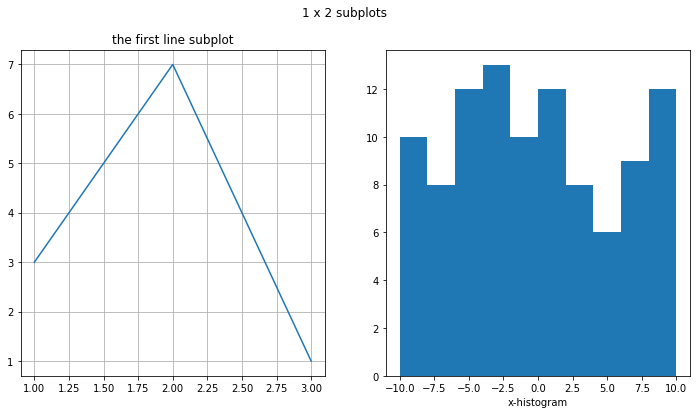

In [5]:
x = np.random.randint(-10, 11, size=100)  # 100 random integers in range [-10, 10]


fig = plt.figure(figsize=(12, 6))
fig.suptitle('1 x 2 subplots')   # overall title

plt.subplot(1, 2, 1)  # we are going to draw on the 1st subplot in a 1x2 plotting grid.
plt.plot([1, 2, 3], [3, 7, 1])
plt.grid(True)
plt.title('the first line subplot')

plt.subplot(1, 2, 2)  # we are going to draw on the 1st subplot in a 1x2 plotting grid.
plt.hist(x)
plt.xlabel('x-histogram')

As can be seen, ** the commands after each `plt.subplot` only applies to that specific subplot.**

** <font color='red'>Where is the `Axes`?</font>**

Now we be wondering what happened, because we didn't see `Axes` at all. In fact, in the `pyplot` environment, usually we don't need to use `Axes` directly, and it is simply hidden from us. However, if you check the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) for `plt.subplot`, this function actually returns an `Axes`.
>matplotlib.pyplot.subplot(*args, \**kwargs)¶  
    > Return a subplot axes at the given grid position.  

>Call signature:  
    subplot(nrows, ncols, index, **kwargs)
    
Thus, `ax = plt.subplot(1, 2, 2)` will receive the `Axes` for the 2nd subplot. However, since we will not use the `Axes` in our code, we just discard it.

On the other hand, if we code using the 2nd kind of APIs, the object-oriented one, we will operate on the `Axes` directly. 
- see the [doc](https://matplotlib.org/api/axes_api.html#plotting) for `Axes` class. You can find it has many methods, many of which are same as `plt`.
- In fact, `plt` module is just a wrapper of `Axes` methods for convenience. For example, `plt.plot` may just call the `Axes.plot` method internally, and the Axes object it is working with is just the *current axes*. Like MATLAB, `plt.gca()` get the current axes. Therefore, I guess the internal flow of `plt.plot` is just equivalent to `plt.gca().plot`.
- Since the `plt` APIs always work with the current figure and the current axes, it is thereby called a *state-machine environment*: we are changing the states of current axes.

Finally, in the first example we do something like 
```python
fig = plt.figure(figsize=(5, 3))
plt.title('A sample figure')
plt.plot([1, 2, 3], [3, 1, 5])
```
Then, where is the Axes? In fact, when you call `plt.plot`, if there is no `Axes` yet, it will create one and use it; otherwise, it will use the current one. Thus, with the `plt` APIs, the first call of `plt.plot` will create an Axes automatically.

## `pyplot` API vs. *object-oriented* API
The following example shows how we can make the same plots using the object-oriented APIs. It is called *object-oriented* because we are using methods of certain classes, mainly `Axes`, instead of independent functions in the `pyplot` module.

Text(0,0.5,'y added later')

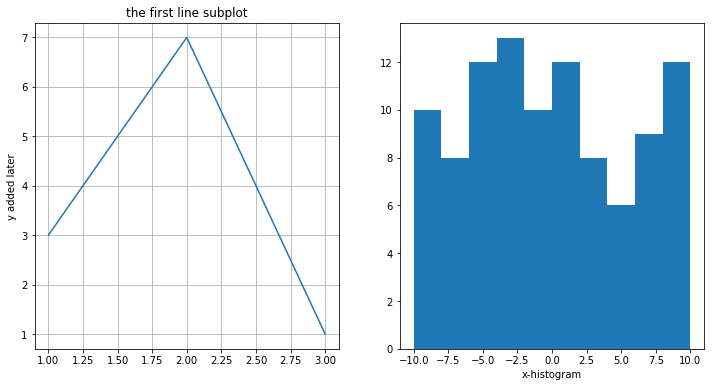

In [6]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot([1, 2, 3], [3, 7, 1])
ax1.grid(True)
ax1.set_title('the first line subplot')

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(x)
ax2.set_xlabel('x-histogram')

ax1.set_ylabel('y added later')  # just to show that ax1 is always bound to the first subplot

Now we can see that, the two levels of APIs are quite similar. Just aforementioned, `pyplot` APIs are just simple wrappers of the *object-oriented* API. But note that in `Axes` many methods need an additional *set_* in their names.

Secondly, `pyplot` functions always operate on the current Axes, which can also be acquired by `plt.gca()`, while we need to specify which Axes we are working on in the 2nd-level APIs, since we have to call the methods of a certain `Axes` object. This is shown in the above code. When the are many subplots, then after calling `plt.subplot(1, 2, 2)`, the current axes object will become the 2nd subplot automatically.

There is also a `plt.subplots(nrows, ncols)` function which can create a figure and the `nrows x ncols` axes directly at the beginning. It returns a figure and an array of axes. In this way, we can avoid the use of `plt.suplot` or `fig.add_subplot` later.

## Summary
In most cases, the `pyplot` APIs, similar to MATLAB ones, are enough for our plotting. If we need more control, then the low-level object-oriented APIs, centered around `Axes` can be used instead. (Of course, they can be used and mixed together.)

Thus, it is recommended to use `pyplot` APIs when possible. If you really need the `Axes` object for speical operations, you can always get it by calling `plt.gca()`.

# <font color='blue'> Use `seaborn` together with `matplotlib`</font>
What is seaborn?
> Seaborn is a Python visualization library **based on matplotlib**. It provides a high-level interface for drawing attractive statistical graphics.  

That is, the `seaborn` package just provides many beautiful templates for us to plot complex graphics (espeically with some kind of statistics) quickly. Since it is built on `matplotlib`, they can cooperate seamleslly. 

** <font color='red'> In other words, we may consider the `seaborn` function just like a function in `pyplot`. </font>** 

One importance between `seaborn` and `pyplot` is that:
- `pyplot` can only work with array-like objects, usually `np.array`, as its `x` and `y`;
- `seaborn` can work with `pandas.DataFrame` directly, that is, you can specify `x` and `y` as the column names of a `DataFrame`;
- of course, `seaborn` can also work with raw arrays, just like `pyplot`.

## Single plot with `seaborn`
The following is a simple example of *density plot*: just like a histogram, but it also estimates the probability density of the data, using for example the [Gaussian kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

Text(0.5,1,'A density plot title')

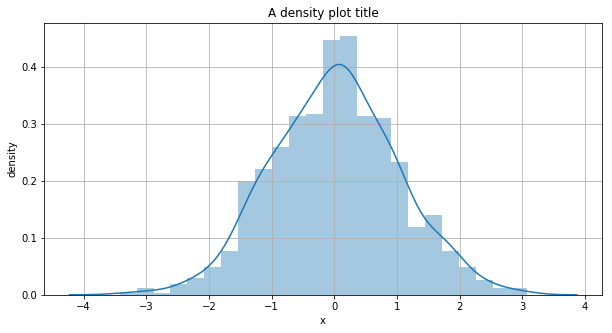

In [7]:
x = np.random.randn(1000)  # generate 1000 samples for normal distribution

fig = plt.figure(figsize=(10, 5))
sns.distplot(x)   # just like plt.plot, it will create an Axes implicitly and draw on that Axes
plt.grid(True)  # show that plt can work with seaborn together seamlessly
plt.xlabel('x')
plt.ylabel('density')
plt.title('A density plot title')

## Multiple subplots with seaborn
As aforementioned, the rule of `seaborn` is just to provide some convenient plotting functions, like the ones in `plt`. Therefore, the figure skeleton is still controlled by `matplotlib` (using the `plt` APIs here).

In [8]:
# dataset provided by the seaborn package
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5,1,'number of each weekday')

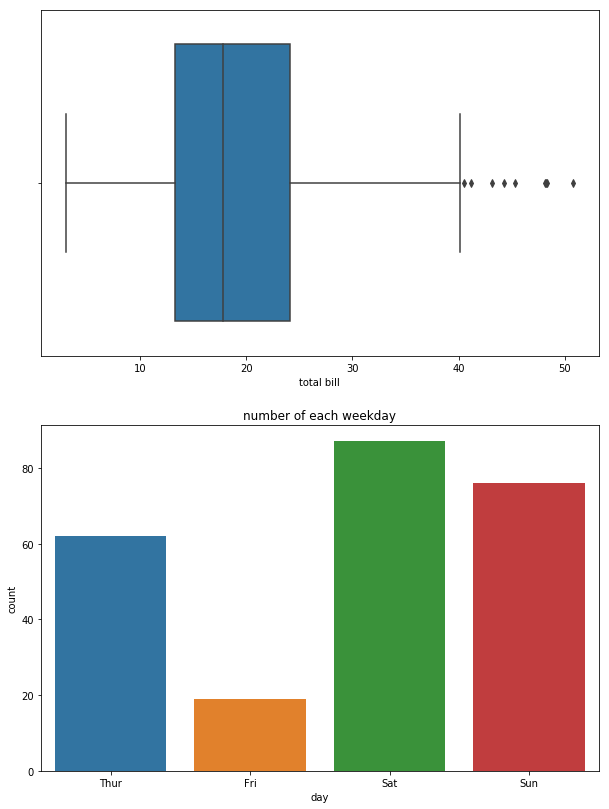

In [9]:
plt.figure(figsize=(10, 14))

plt.subplot(2, 1, 1)
sns.boxplot(x='total_bill', data=tips)
plt.xlabel('total bill')

plt.subplot(2, 1, 2)
sns.countplot(x='day', data=tips)
plt.title('number of each weekday')

## `ax` parameter of seaborn function: specify which Axes we need to work on
As aforementioned, `pyplot` APIs work with the current Axes, and similarly, `seaborn` works on the current `Axes` by default.  
However, we know that if we want to target a special `Axes`, called `ax` for example, in `matplotlib`, we can simply call methods of `ax` like `ax.plot`. Then, how can we achieve this in `seaborn`?  
It is also simple. Most of `seaborn` functions accept an argument called `ax`, which is default to be None (i.e., the current Axes is used then). If we have an `Axes` object to be manipulated, just pass it to this parameter. It is like the *object-oriented* APIs in `matplotlib`.

In the following example, I first creat a multi-plot figure with [`plt.subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) (note the ending *s*) and get two axes. Then, I draw two graphs. 

Text(0.5,0,'Guassian distributed random number')

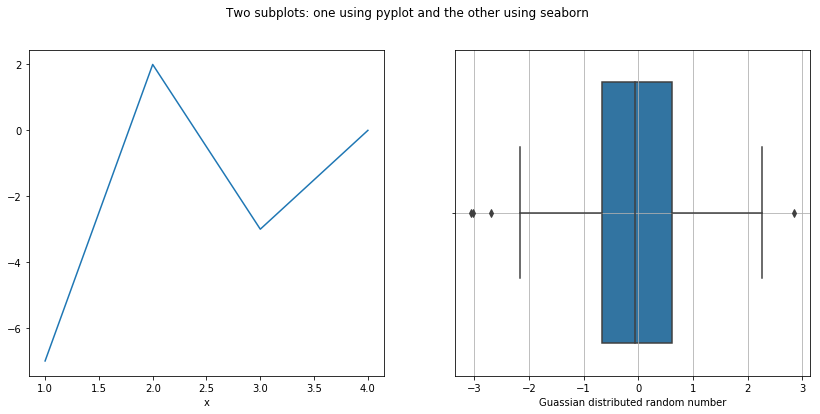

In [10]:
fig, axes_array = plt.subplots(1, 2, figsize=(14, 6))
ax1 = axes_array[0]
ax2 = axes_array[1]
plt.suptitle('Two subplots: one using pyplot and the other using seaborn')

# on subplot 1: use the pyplot API
ax1.plot([1, 2, 3, 4], [-7, 2,-3, 0])
ax1.set_xlabel('x')

# on subplot 2: use the seaborn
x = np.random.randn(200)
sns.boxplot(x, orient='h', ax=ax2)  # horizontal, pass into the Axes
ax2.grid(True)
ax2.set_xlabel('Guassian distributed random number')

Comparing the above two examples, we can see that `seaborn` can be integrated into both the `pyplot` API and the *object-oriented* API naturally. In most cases, the two styles should have the same capacity for drawing.

## Summary
- There is nothing special about `seaborn`． It just provides some high-level convenient APIs to draw complicated graphics, similar to the ones in `pyplot`.
- We can use the two styles of `matplotlib` together with `seaborn`. However, it will be easier to remember the functions and APIS if we adhere to one style. Personally, I prefer the `pyplot` APIs, unless I really need `Axes` for very low-level operations.
- In this section, only basic functionalities of `seaborn` are shown. It is quite powerful and has more advanced features. We may learn that when needed. However, the core framework/skeleton of plotting in `matplotlib` remains the same.

# <font color= "blue">More detailed control and decoration of figures</font>
In this part, let's try more detailed control of the generated figures. Most of the operations can still be achieved with the `pyplot` APIs.

## Axis limit and ticks

In [11]:
# generate a dataset, where x is a set of integers and y is a set of random numbers
np.random.seed(123)  # for reproduction of the results
n = 200
x = np.random.randint(0, 28, n)
y = np.random.rand(n) * 5
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,13,4.342861
1,2,2.089962
2,2,0.294691
3,6,2.392295
4,17,2.605797


`seaborn.pointplot`
> Show point estimates and confidence intervals using scatter plot glyphs.  

By default, it shows the mean and the standard deviation of values in each category (for comparison purpose).  
In the above `df` dataset, for each `x`, we may have multiple `y` values.

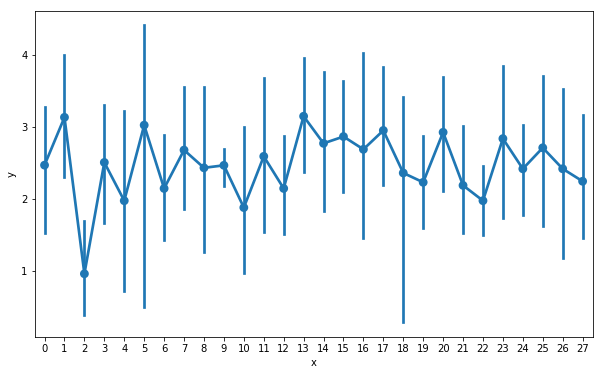

In [12]:
plt.figure(figsize=(10, 6))
sns.pointplot('x', 'y', data=df)

Now we want (1) x axis range [0, 30] (2) show ticks with an interval of 5, i.e., 0, 5, 10, ..., 30. Like MATLAB, we use two functions here
- `matplotlib.pyplot.xlim`
> Get or set the x limits of the current axes.
- `matplotlib.pyplot.xticks`
> Get or set the current tick locations and labels of the x-axis.
```python
locs, labels = xticks()           # Get locations and labels
xticks(locs, [labels], **kwargs)  # Set locations and labels
```

(0, 30)

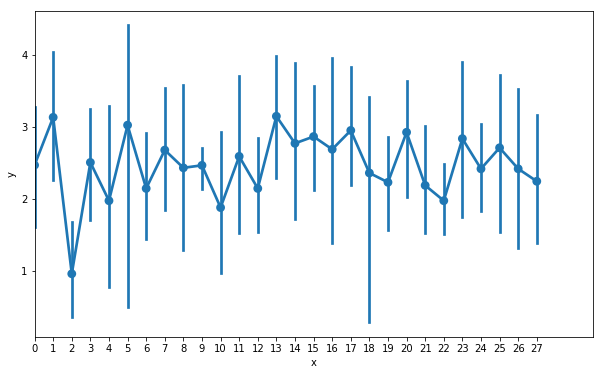

In [13]:
plt.figure(figsize=(10, 6))
sns.pointplot('x', 'y', data=df)
plt.xlim(0, 30)  # with only this the interval is still of length 1, i.e., the locations of xticks are still 0,1,2,..., 27

As we see, `plt.xlim` can change the limits of x axis, but the ticks remain the same. Therefore, we want to specify the xticks at locations 0, 5, ..., 30, and the label (text) at each tick is just the number (location) itself. 

([<matplotlib.axis.XTick at 0x2586f9c0470>,
 <a list of 7 Text xticklabel objects>)

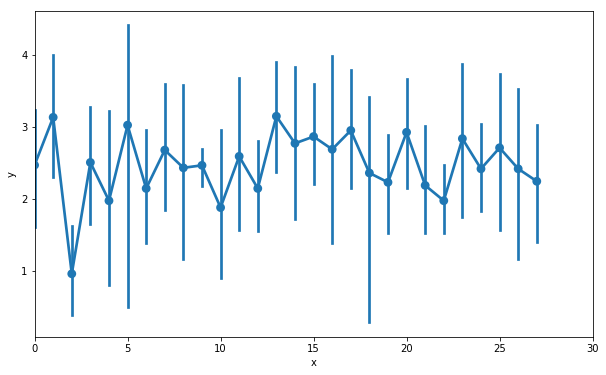

In [14]:
plt.figure(figsize=(10, 6))
sns.pointplot('x', 'y', data=df)
plt.xlim(0, 30)
plt.xticks(np.arange(0, 31, step=5), np.arange(0, 31, step=5))

We have made it now. The output texts above the figure are just the returns of the `plt.xticks` function, i.e., it returns the *locs* and *labels*, though we are actually setting them. If the outputs are annoying, just like MATLAB, use a semicolon ; to suppress output. (In Jupyter notebook, the return of the last line in a cell is always printed even we didn't use `print`).

More interestingly, we can use any labels for the ticks as we like. For example, I replace the number with English words.

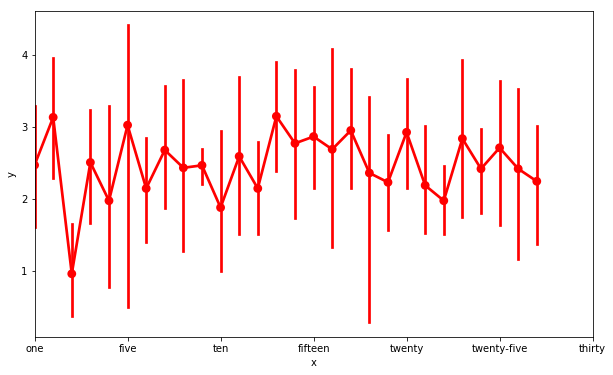

In [15]:
plt.figure(figsize=(10, 6))
sns.pointplot('x', 'y', data=df, color='r')
plt.xlim(0, 30)
plt.xticks(np.arange(0, 31, step=5), ['one', 'five', 'ten', 'fifteen', 'twenty', 'twenty-five', 'thirty']); # semicolon->no output

In the above figure, I also show that we can use other parameters of `seaborn.pointplot` to control the appearance. In practice, always check the [documentation](https://seaborn.pydata.org/generated/seaborn.pointplot.html) to learn the usage of many parameters.

Another common need in plotting is to adjust the font size.

## Text properties: font size and color
Generally, in `matplotlib`, if a command (function) involves the manipulation of texts, then this function usually accepts a set of *keyword-only* arguments. For example, when we want to set the `xticks`, the function signature is 
```python
xticks(locs, [labels], **kwargs)  # Set locations and labels
```
In Python, \** before an argument represents *keyword-only* parameters (one or more) in this form `keyword=value`. For the allowed keywords, we have to check the documentation. 
>**kwargs
Text properties can be used to control the appearance of the labels.

What are the text properties? `Text` is a class in `matplotlib`, `matplotlib.text.Text`. Its properties are listed [here](https://matplotlib.org/api/text_api.html#matplotlib.text.Text). The two in which we are interested are `fontsize` (an alias of `size`) and `color`.

Now it becomes clear: in `xticks`, a label is actually something like `Text`, we can specify its properties for the `kwargs`.

Text(0,0.5,'italic bold y')

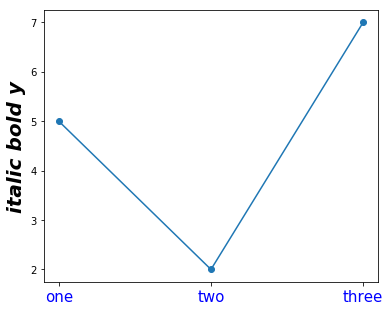

In [16]:
fig = plt.figure(figsize=(6, 5))
plt.plot([1, 2, 3], [5, 2, 7], 'o-')
plt.xticks([1, 2, 3], ['one', 'two', 'three'], fontsize=15, color='blue')
plt.ylabel('italic bold y', fontsize=20, style='italic', weight='bold')

As shown above, similarly, the `plt.ylabel` has the same `**kwargs` to specify text properties.

Now the question is that, usually in a project, we need to make many plots and we have to set the figure style including fontsize, color, linestyle and all others again and again. Thus, we usually want something like a template, which can be set once and then applied to the all the following figures. This is what exactly `matplotlib.rcParams` does.

## `matplotlib.rcParams`: configure default settings for matplotlib
这个就像Word中的样式功能，在绘制大量图时非常有用。如果后面想改样式，只要改一个地方即可，不然就要一张张图的设置和更改。  
对于某个具体的工作（比如论文/报告），通常会有个大致的风格要求，可以通过`rcParams`设置。后面如果换了风格要求，修改`rcParams`即可。

What is [`matplotlib rcParams`](https://matplotlib.org/users/customizing.html)?  
It is just a dictionary-like object to change default `matplotlib` settings.  
In the following example, we set the default fontsize, fontfamily and line width, style.

In [17]:
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.linestyle'] = '--'
matplotlib.rcParams['font.family'] = 'Calibri'
matplotlib.rcParams['font.size'] = 20   # default is 10 pts


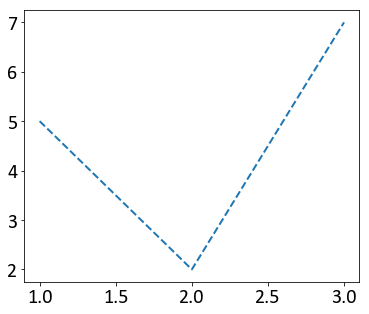

In [18]:
fig = plt.figure(figsize=(6, 5))
plt.plot([1, 2, 3], [5, 2, 7])

There are many properties to be configured in `rcParams`. To see a list of all possible keys and their default values, you can print `matplotlib.rcParams.keys()`.

In [19]:
# 
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use

### the *matplotlibrc* file
Apart from setting the `rcParams` in codes, we can also provide a file named **matplotlibrc** to set the properties we need. 

A sample matplotlibrc file is given [here](https://matplotlib.org/users/customizing.html). We can make necessary modifications on it.

### Predefined styles: some built-in matplotlib rc configurations
Matplotlib comes with some predefined styles: a style is just like a specific configuration of `matplotlib.rcParams`. We can use them directly without any manual configurations.

In [20]:
# check which styles are available now
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [21]:
# we choose to use the 'ggplot' style: this emulates the style of the popular ggplot package for R language.
plt.style.use('ggplot')

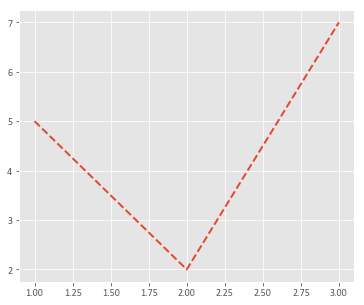

In [22]:
# run the above simple example again 
fig = plt.figure(figsize=(6, 5))
plt.plot([1, 2, 3], [5, 2, 7])

In [23]:
matplotlib.rcParams['xtick.labelsize']

'medium'

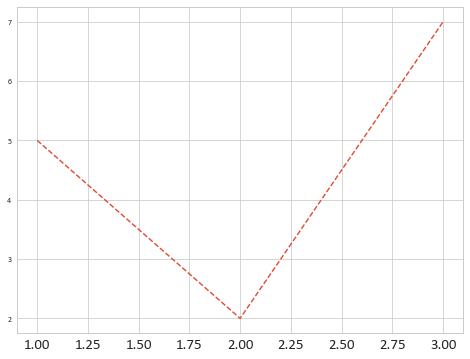

In [24]:
# use seaborn paper style
plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])

# 'font.size' will not apply to xtick.labelsize
matplotlib.rcParams['font.family'] = 'Calibri'
matplotlib.rcParams['font.size'] = 30
matplotlib.rcParams['xtick.labelsize'] = 15
# run the above simple example again 
fig = plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3], [5, 2, 7])
plt.savefig('t1.pdf', bbox_inches='tight')

# seaborn
## Style && appearance
[seaborn.set_palette](https://seaborn.pydata.org/generated/seaborn.set_palette.html#seaborn.set_palette)

[seaborn.set_context](https://seaborn.pydata.org/generated/seaborn.set_context.html#seaborn.set_context)  
his affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.

[seaborn.set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html)   
These styles are also built in matplotlib. We can use `plt.style.use`.

The official tutorial [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html), [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)

# Creating publication quality figures

Note the importance of [tight layout](https://matplotlib.org/tutorials/intermediate/tight_layout_guide.html)

[1] A good reference on GitHub: [Creating publication-quality figures with Matplotlib](https://github.com/jbmouret/matplotlib_for_papers). See [github.com.pdf](./doc/github.com-.pdf).

[2] [Styling plots for publication with matplotlib](http://jonchar.net/notebooks/matplotlib-styling/). How to set the proper figure size in a paper?

[3] 

## `plt.tight_layout` may change the figure size of subplots
[Subplots: tight_layout changes figure size](https://stackoverflow.com/questions/22144993/subplots-tight-layout-changes-figure-size)   

To control the positions of the subplots precisely, see
[Customizing Location of Subplot Using GridSpec](https://matplotlib.org/users/gridspec.html)

## color palettes
[seaborn Choosing color palettes](http://seaborn.pydata.org/tutorial/color_palettes.html)

In [25]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['Calibri'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'DejaVu Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}